<h1 style="color: salmon">Random Forest for Classification (n=15k)</h1>
I can do it.

In [1]:
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("../data/hybrid_training_data_15k.csv", encoding="utf-8")
df.head()

,spending_vel_3h,spending_vel_6h,spending_vel_24h,frequency_3h,frequency_6h,frequency_24h,category_risk_score,merchant_risk_score,age_risk_score,is_enterprise,cluster,fraud
0,-0.216590,13.325806,5.255942,0.155602,0.305342,0.18639,-0.194243,-0.151313,-0.192872,-0.04433,2,0
1,0.003903,-0.071959,-0.060389,0.155602,0.305342,0.18639,-0.194243,-0.151313,0.428306,-0.04433,0,0
2,-0.113892,-0.059218,-0.115343,0.155602,0.305342,0.18639,-0.194243,-0.151313,0.428306,-0.04433,0,0
3,-0.197812,-0.284860,-0.204226,0.155602,-0.574066,0.18639,-0.194243,-0.151313,-0.192872,-0.04433,2,0
4,-0.227820,-0.258366,-0.386029,0.155602,0.305342,0.18639,-0.194243,-0.151313,0.428306,-0.04433,0,0


In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [8]:
rf = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=15,            
    min_samples_leaf=3,        # More specific rules
    class_weight='balanced',
    n_jobs=-1,                 # Verbose aka show the progress
    random_state=30
)
rf.fit(X_train, y_train)    # Training part
# joblib.dump(rf, "randomForestModel.joblib") # Save for later use - when test on actual data

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [ ]:
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred, digits=3))

# For fraud detection, we should focus on the recall => how many actual fraud cases did we catch

0.9956666666666667
              precision    recall  f1-score   support

           0      0.999     0.997     0.998      2963
           1      0.786     0.892     0.835        37

    accuracy                          0.996      3000
   macro avg      0.892     0.944     0.917      3000
weighted avg      0.996     0.996     0.996      3000



C:\Users\Admin\AppData\Local\Temp\ipykernel_19132\1085187201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(25), palette='viridis')


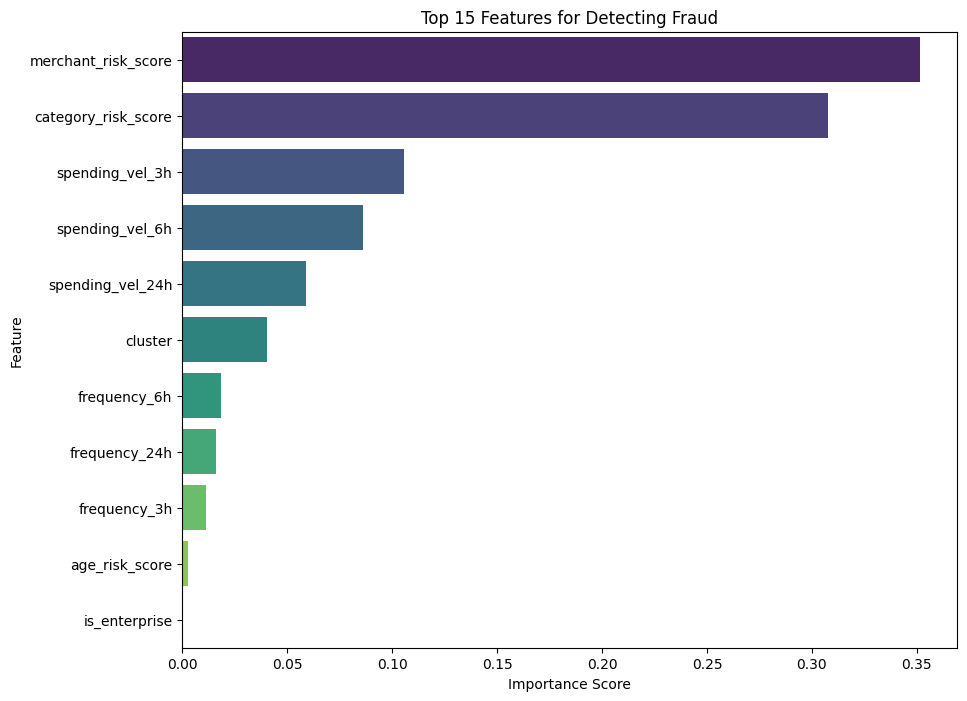

In [10]:
# 1. Get feature importances from your trained model
importances = rf.feature_importances_
feature_names = X.columns

# 2. Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Plot only the Top 15 (otherwise it gets too crowded)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(25), palette='viridis')

plt.title('Top 15 Features for Detecting Fraud')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [11]:
joblib.dump(rf, "../app/models/randomForest_model.pkl")

['../app/models/randomForest_model.pkl']